<a href="https://colab.research.google.com/github/NoSoyRodr1/QuimicaLabUNMSM/blob/main/PC_2_Quimica_UNMSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{UNMSM | Química}$$
$$\large \textbf{PC Nº2 | Materia y clasificación}$$

_Profesor: Jesus Alvarado Huayhuaz_

Todas las indicaciones para la presentación de la práctica son explicadas en clase y brindadas en el material de enunciado de preguntas en formato PDF.

## Pregunta 1: DataFrames y listas en python (4 puntos)

Usando PeriodicTable, crea una tabla con 20 elementos químicos y en las columnas considera: nombre, simbolo, masa_atomica, numero_atomico	y valencias. Puedes ayudarte del siguiente [material](https://github.com/inefable12/UNMSM_quimica_2023/blob/main/Python_para_quimica_2023.ipynb).

In [ ]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 36.8 MB/s eta 0:00:00


In [ ]:
pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 962.4 kB/s eta 0:00:00


In [ ]:
from rdkit import Chem

PeriodicTable = Chem.GetPeriodicTable()

In [ ]:
element_symbols = []

for i in range(1,21):
  element_symbols.append(PeriodicTable.GetElementSymbol(i))

In [ ]:
numero_atomico = [PeriodicTable.GetAtomicNumber(x) for x in element_symbols]
masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
nombre_del_elemento = [PeriodicTable.GetElementName(x) for x in range(1,21)]
valencias = [PeriodicTable.GetValenceList(x) for x in range(1,21)]

In [ ]:
from deep_translator import GoogleTranslator
traductor = GoogleTranslator(source='en', target='es')
resultado = traductor.translate_batch(nombre_del_elemento)
print(resultado)

['Hidrógeno', 'Helio', 'Litio', 'Berilio', 'Boro', 'Carbón', 'Nitrógeno', 'Oxígeno', 'Flúor', 'Neón', 'Sodio', 'Magnesio', 'Aluminio', 'Silicio', 'Fósforo', 'Azufre', 'Cloro', 'Argón', 'Potasio', 'Calcio']


In [ ]:
import pandas as pd

data = {'nombre': resultado, 'simbolo': element_symbols,
        'masa_atomica': masa_atomica, 'numero_atomico': numero_atomico,
        'valencias': valencias}
df = pd.DataFrame(data, index=range(1, len(resultado) + 1))
df

,nombre,simbolo,masa_atomica,numero_atomico,valencias
1,Hidrógeno,H,1.008,1,[1]
2,Helio,He,4.003,2,[0]
3,Litio,Li,6.941,3,"[1, -1]"
4,Berilio,Be,9.012,4,[2]
5,Boro,B,10.812,5,[3]
6,Carbón,C,12.011,6,[4]
7,Nitrógeno,N,14.007,7,[3]
8,Oxígeno,O,15.999,8,[2]
9,Flúor,F,18.998,9,[1]
10,Neón,Ne,20.180,10,[0]


## Pregunta 2: Configuración electrónica (4 puntos)

Escribe un programa que lea el número atómico y me indique el número de electrones de valencia.

In [ ]:
def configuracion_electronica_y_electrones_de_valencia(protones):
    orbitales = ['1s', '2s', '2p', '3s', '3p', '4s', '3d', '4p', '5s', '4d', '5p', '6s', '4f', '5d', '6p', '7s', '5f', '6d', '7p']
    maximo_electrones = [2, 2, 6, 2, 6, 2, 10, 6, 2, 10, 6, 2, 14, 10, 6, 2, 14, 10, 6]
    electrones_orbitales = dict(zip(orbitales, maximo_electrones))

    configuracion_electronica = {}
    electrones_de_valencia = 0

    for orbital in orbitales:
        if protones > 0:
            if protones > electrones_orbitales[orbital]:
                configuracion_electronica[orbital] = electrones_orbitales[orbital]
                protones -= electrones_orbitales[orbital]
            else:
                configuracion_electronica[orbital] = protones
                protones = 0
        else:
            break

    nivel_mas_externo = max(configuracion_electronica.keys(), key=lambda k: int(k[0]))
    electrones_de_valencia = sum(valor for clave, valor in configuracion_electronica.items() if clave[0] == nivel_mas_externo[0])

    return configuracion_electronica, electrones_de_valencia

protones = int(input("Ingrese el número de protones: "))
config, valencia = configuracion_electronica_y_electrones_de_valencia(protones)
print("Configuración electrónica:", config)
print("Electrones de valencia:", valencia)

Ingrese el número de protones: 6
Configuración electrónica: {'1s': 2, '2s': 2, '2p': 2}
Electrones de valencia: 4


# Pregunta 3: Molecularidad & compuestos covalentes (4 puntos)

In [ ]:
#Código necesario para generar la imagen, no editar
!pip install faerun-notebook==0.1.5b0
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

Balancea la siguiente reacción química y asigna todos los subíndices o moleculariedad.

In [ ]:
SmilesDrawer(value=[("Rxn", "CC=CC.O=O>>C(=O)=O.O")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'CC=CC.O=O>>C(=O)=O.O…

**Reacción balanceada:**
---
**C4H8 + 6 O2 →	4 CO2 + 4H20**

---


En C4H8, "4" es el subíndice que indica que hay cuatro átomos de carbono en una molécula de buteno.

---


En O2, no hay subíndices porque el oxígeno es diatómico en su forma molecular, lo que quere decir que dos átomos de oxígeno están unidos en una molécula de oxígeno.

---


En CO2, no hay subíndices porque la fórmula ya muestra la relación correcta entre átomos de carbono y oxígeno en una molécula de dióxido de carbono.

---


En H2O, el "2" es el subíndice que indica que hay dos átomos de hidrógeno en una molécula de agua.


---

Coeficientes estequiométricos: 1, 6, 4 y 4

## Pregunta 4: SMILES, RDKit y Open Babel (4 puntos)


Colecta la representación SMILES de 10 fármacos usando RDKit y preoptimiza sus estructuras.



In [1]:
!apt-get -qq install -y openbabel

Selecting previously unselected package libinchi1.
(Reading database ... 120901 files and directories currently installed.)
Preparing to unpack .../libinchi1_1.03+dfsg-4_amd64.deb ...
Unpacking libinchi1 (1.03+dfsg-4) ...
Selecting previously unselected package libmaeparser1:amd64.
Preparing to unpack .../libmaeparser1_1.2.4-1build1_amd64.deb ...
Unpacking libmaeparser1:amd64 (1.2.4-1build1) ...
Selecting previously unselected package libopenbabel7.
Preparing to unpack .../libopenbabel7_3.1.1+dfsg-6ubuntu5_amd64.deb ...
Unpacking libopenbabel7 (3.1.1+dfsg-6ubuntu5) ...
Selecting previously unselected package openbabel.
Preparing to unpack .../openbabel_3.1.1+dfsg-6ubuntu5_amd64.deb ...
Unpacking openbabel (3.1.1+dfsg-6ubuntu5) ...
Setting up libmaeparser1:amd64 (1.2.4-1build1) ...
Setting up libinchi1 (1.03+dfsg-4) ...
Setting up libopenbabel7 (3.1.1+dfsg-6ubuntu5) ...
Setting up openbabel (3.1.1+dfsg-6ubuntu5) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
/sbin/ldconfig.r

In [11]:
!obabel -i smi farmacos.smi -o sdf --gen3D > output.sdf

10 molecules converted


In [13]:
!obabel -i sdf output.sdf -o mol2 -O _.mol2 -h -m

10 molecules converted
10 files output. The first is _1.mol2


In [ ]:
!obabel *.mol2 -O opt.xyz --minimize --sd --steps 20000 --ff MMFF94 -p 7.4 --log -m

*   **Ibuprofen**
*   **Aspirin**
*   **Acetaminophen**
*   **Ciprofloxacin**
*   **Lisinopril**
*   **Atorvastatin**
*   **Metformin**
*   **Omeprazole**
*   **Atropine**
*   **Morphine**



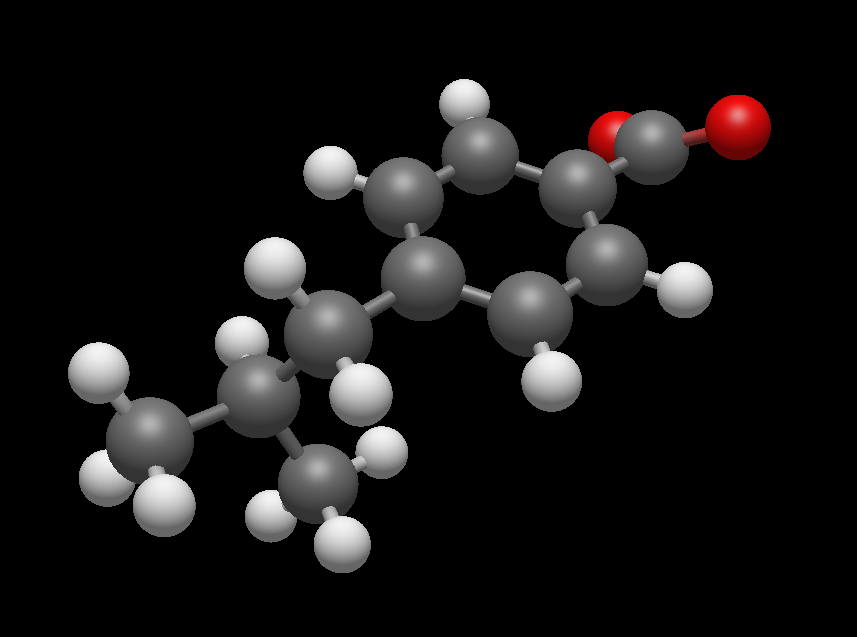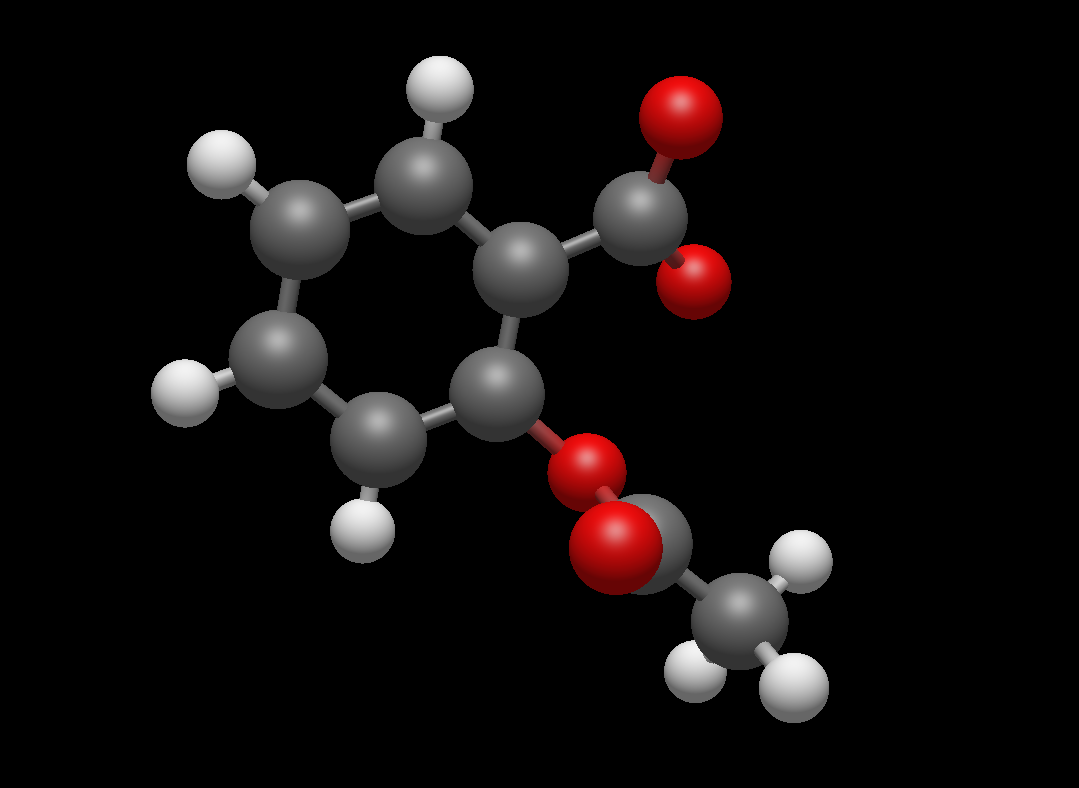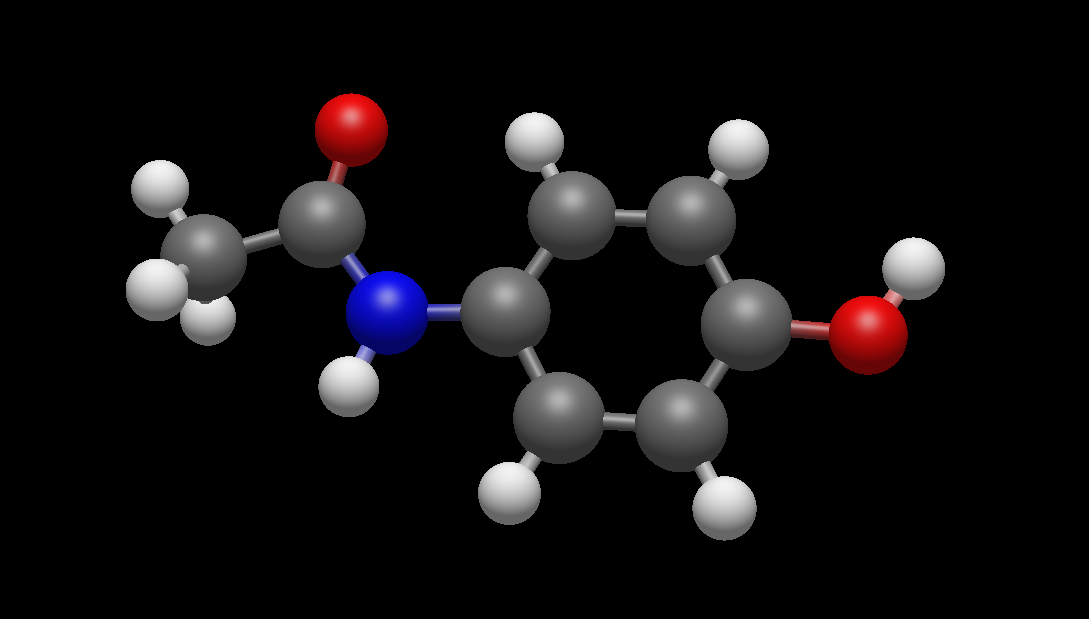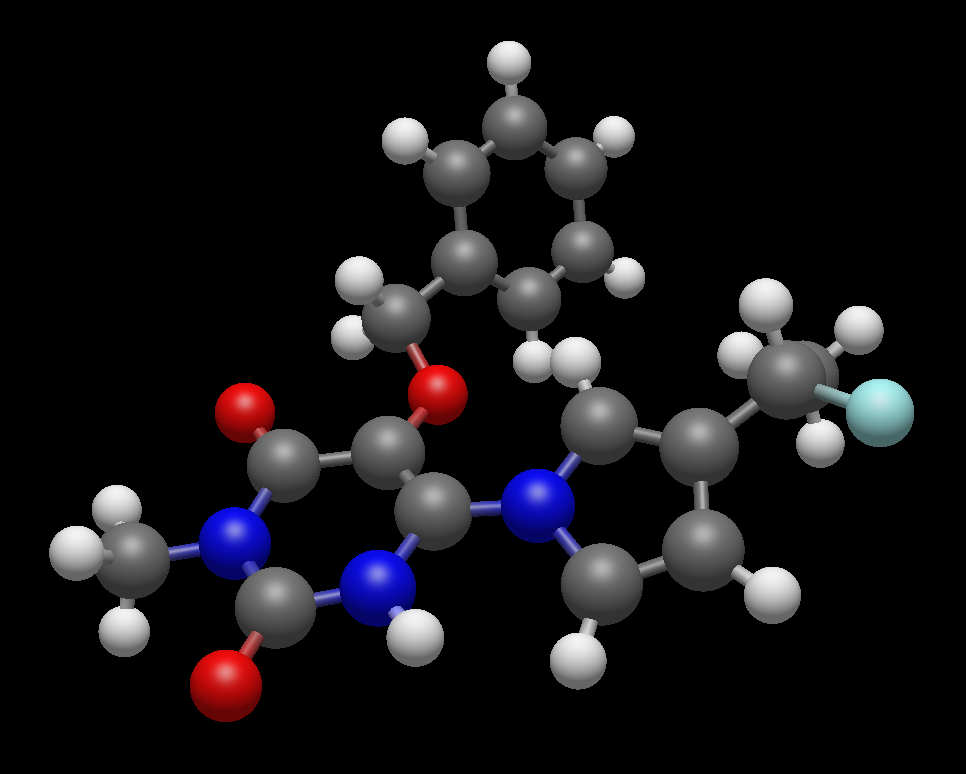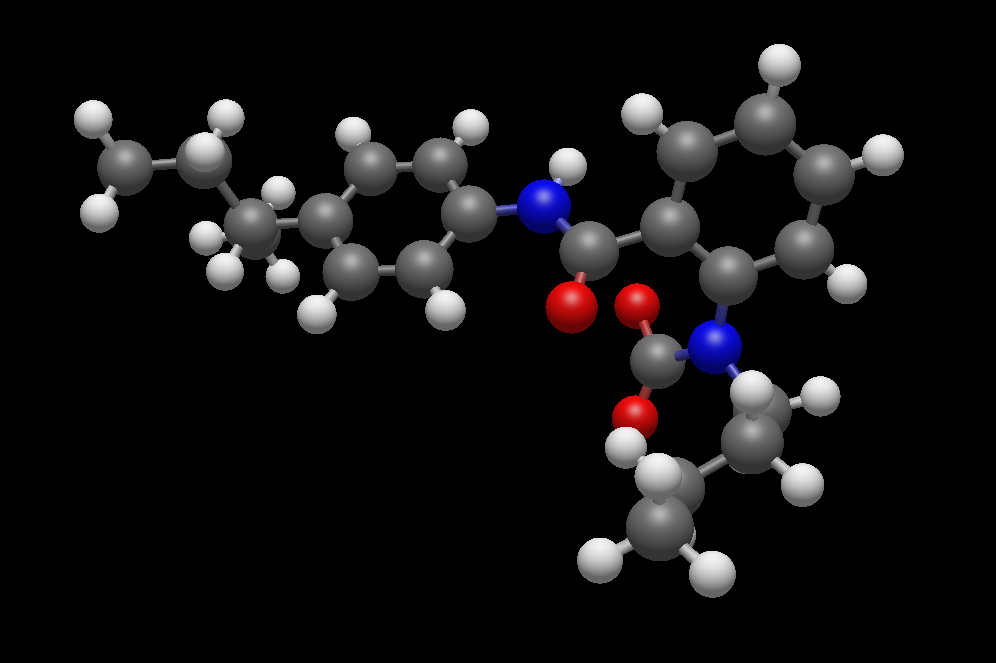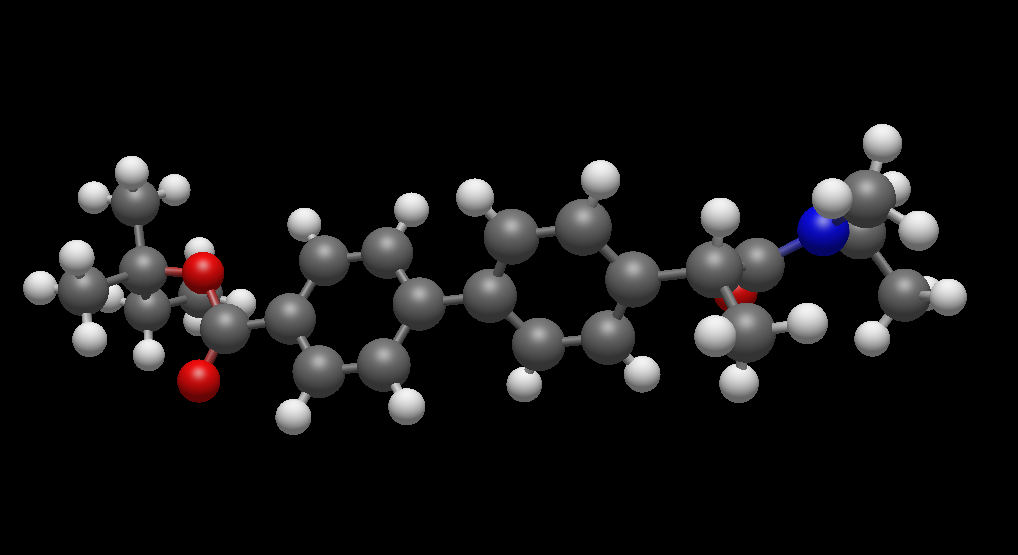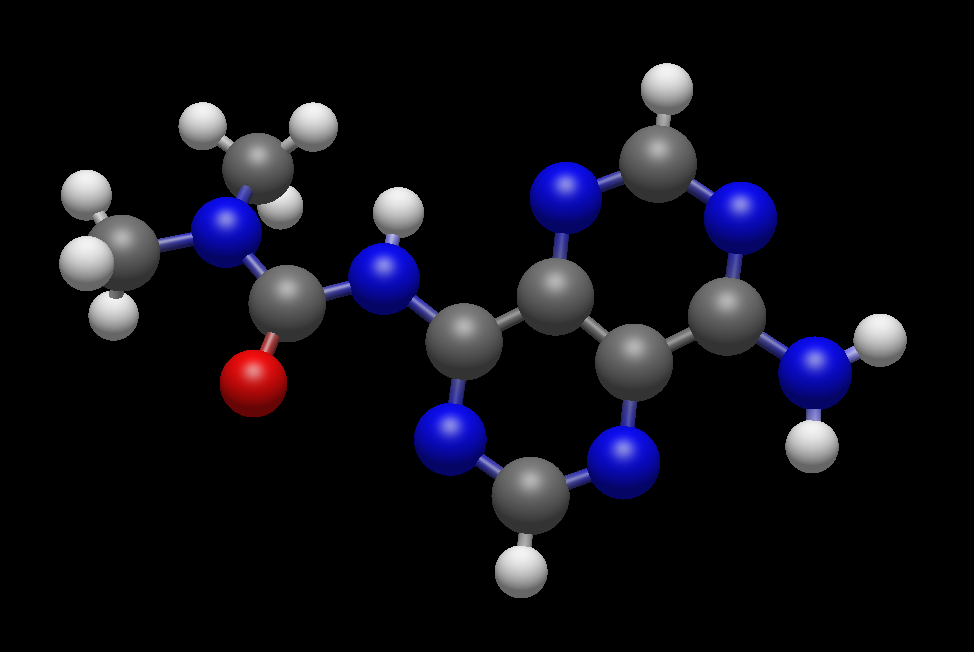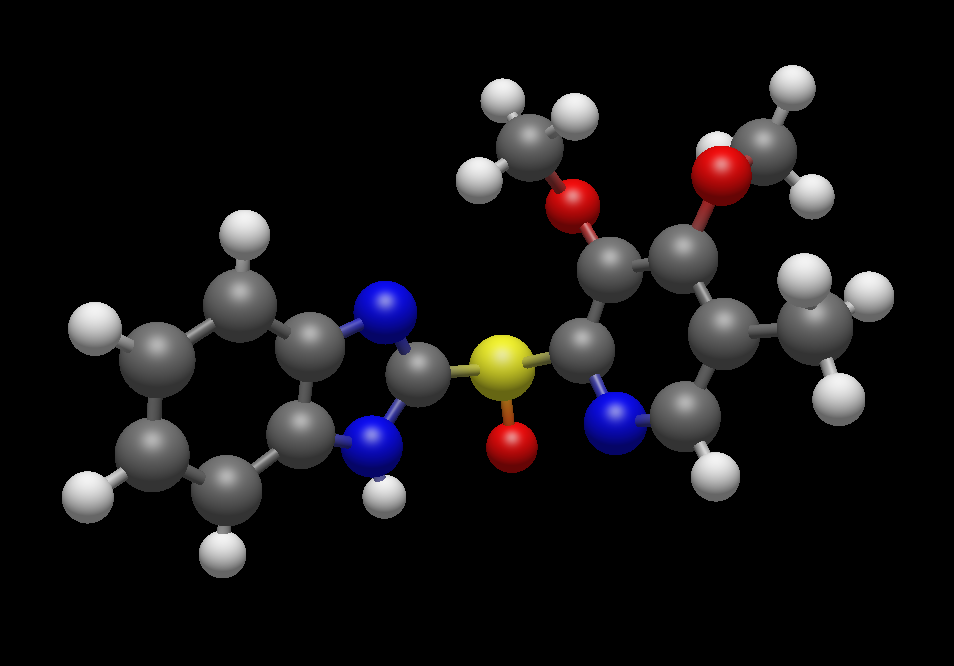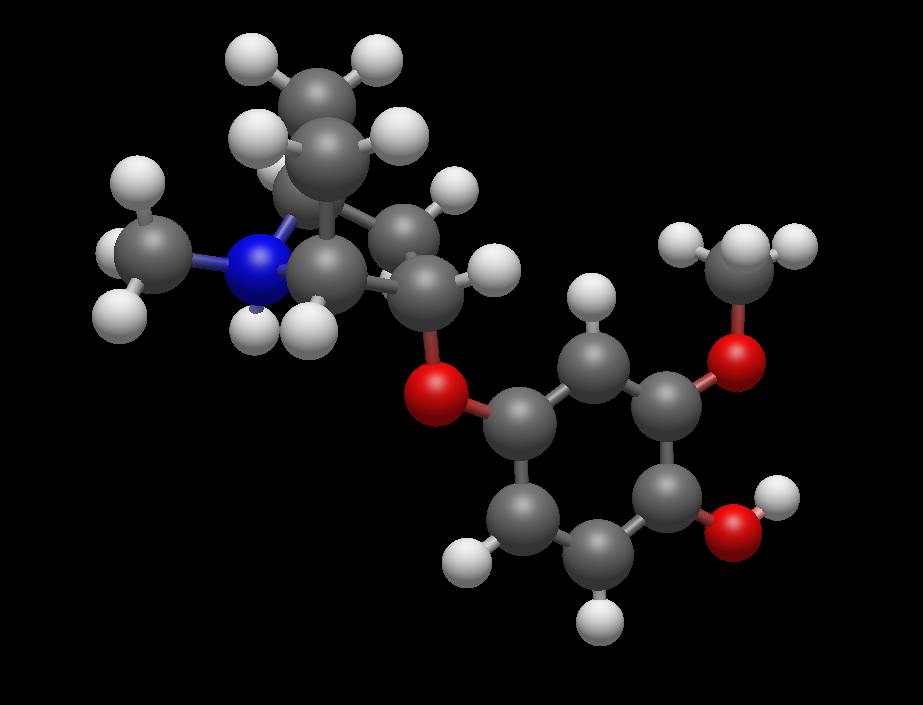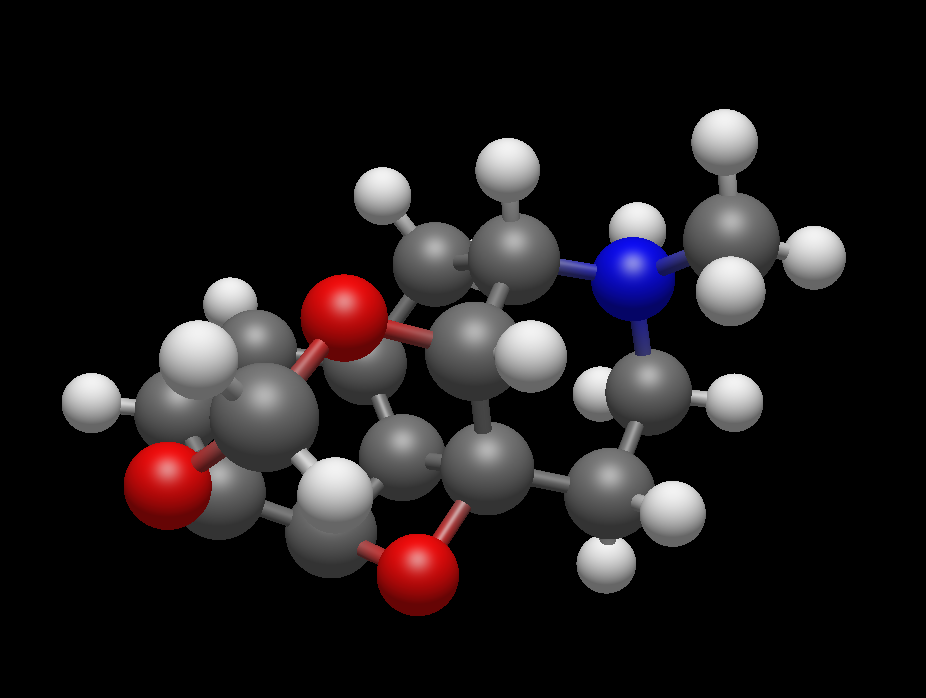

## Pregunta 5: Método científico (4 puntos)

Leer el artículo disponibilizado por el profesor y explica cómo es aplicado el método científico. Emplea como máximo 300 palabras.

#**El método científico se utiliza en este artículo siguiendo estos pasos:**
**Observación del problema:** Se identifica la necesidad de mejorar la comprensión de conceptos químicos en estudiantes universitarios, marcando el inicio de la investigación.

**Hipótesis implícita:** La estrategia didáctica propuesta se considera una suposición. Se plantea que emplear modelos didácticos basados en cajas de huevos y crear pasaportes atómicos puede aumentar la comprensión de los estudiantes en química atómica.

**Experimentación controlada:** La estrategia se pone en práctica en tres grupos de estudiantes universitarios, asignando a cada uno diferentes elementos químicos para que trabajen en la construcción de modelos didácticos. Esto se asemeja a experimentos controlados que permiten evaluar su eficacia.

**Recopilación y análisis de datos:** Se recogen y analizan los resultados de la implementación, incluyendo calificaciones y tasas de aprobación.

**Interpretación de resultados:** Los resultados reflejan altos niveles de aprobación y estudiantes con calificaciones sobresalientes, lo que se interpreta como evidencia del éxito de la estrategia en la enseñanza de química atómica.

**Conclusión y divulgación de resultados:** El artículo concluye que la estrategia es efectiva y enfatiza la importancia de los modelos didácticos en la enseñanza de la química. Estos resultados y conclusiones se comparten con la comunidad científica mediante la publicación del artículo.